https://snap.stanford.edu/data/ego-Facebook.html

# Exploration générale

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Graphe des "ego" 

Un "ego" est considéré comme une personne au centre d'un réseau social. On a ici les informations sur 10 ego. Leurs ID respectifs sont stockés ci-dessous.

In [39]:
ego_ids = [0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]

In [40]:
# Dossier contenant les fichiers extraits
base_path = "../data/facebook/"

# Id de l'ego à explorer (par ex. 0)
ego_id = str(ego_ids[0])

# Message de print
print(f"Exploration des données de l'ego {ego_id}\n-----------------------------------\n")

# Chemins des fichiers
edges_path = os.path.join(base_path, f"{ego_id}.edges")
feat_path = os.path.join(base_path, f"{ego_id}.feat")
featnames_path = os.path.join(base_path, f"{ego_id}.featnames")
egofeat_path = os.path.join(base_path, f"{ego_id}.egofeat")
circles_path = os.path.join(base_path, f"{ego_id}.circles")

# Lire les arêtes (relations d’amitié dans l’ego-network)
with open(edges_path, 'r') as f:
    edges = [line.strip().split() for line in f]
print(f"Nombre d'arêtes : {len(edges)}")
print("Exemples d'arêtes :", edges[:5])

# Lire les features des amis
features = np.loadtxt(feat_path)
# Titres des colonnes
print(f"\nFeatures (shape): {features.shape}")
print("Première ligne de features :", features[0])
print("Features are '1' if the user has this property in their profile, and '0' otherwise.")

# Lire les noms des features
with open(featnames_path, 'r') as f:
    feat_names = [line.strip() for line in f]
print(f"\nNombre de features : {len(feat_names)}")
print("Exemples :", feat_names[:5])

# Lire les features du noeud ego lui-même
ego_features = np.loadtxt(egofeat_path)
print(f"\nFeatures de l'ego : {ego_features[:10]}...")

# Lire les cercles (Un cercle est un ensemble d’amis regroupés par l’utilisateur selon un critère personnel.)
with open(circles_path, 'r') as f:
    circles = [line.strip().split() for line in f]
print(f"\nNombre de cercles définis par l'ego : {len(circles)}")
print("Exemple de cercle :", circles[0])

Exploration des données de l'ego 0
-----------------------------------

Nombre d'arêtes : 5038
Exemples d'arêtes : [['236', '186'], ['122', '285'], ['24', '346'], ['271', '304'], ['176', '9']]

Features (shape): (347, 225)
Première ligne de features : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Features are '1' if the user has this property in their profil

## Graphe combiné pour l'analyse

### Exploration du graphe

In [26]:
# Charger le graphe depuis un fichier d'arêtes (espace comme séparateur)
G = nx.read_edgelist("../data/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# Afficher des infos de base
print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre d’arêtes : {G.number_of_edges()}")
print(f"Est-ce connexe ? : {nx.is_connected(G)}")
print(f"Nombre de composantes connexes : {nx.number_connected_components(G)}")
print(f"Graphe dirigé ? : {nx.is_directed(G)}")

# Exemple : nombre de voisins du noeud 0
print("Voisins du noeud 0 :", list(G.neighbors(0))[:10], "...")

Nombre de nœuds : 4039
Nombre d’arêtes : 88234
Est-ce connexe ? : True
Nombre de composantes connexes : 1
Graphe dirigé ? : False
Voisins du noeud 0 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ...


In [33]:
print(f"Diamètre du graphe : {nx.diameter(G)}")
print(f"Rayon du graphe : {nx.radius(G)}")
print(f"Centre du graphe : {nx.center(G)}")
print(f"Nombre de triangles : {sum(nx.triangles(G).values()) // 3}")

Diamètre du graphe : 8
Rayon du graphe : 4
Centre du graphe : [567]
Nombre de triangles : 1612010


- nx.diameter(G): plus grande distance possible entre deux noeuds du graphe. C'est le maximum de l'excentricité pour tous les noeuds.

    - La théorie des six degrés de séparation affirme que toute personne dans le monde peut être reliée à n’importe quelle autre à travers au plus 6 relations sociales (diamètre <=6). On peut s'attendre à tendre vers cette valeur si on ajoute d'autres personnes dans ce graphe.
- nx.radius(G): c'est le minimum de l'excentricité
- nx.center renvoie l’ensemble des nœuds qui ont la distance maximale minimale vers tous les autres (valeur du rayon) En d’autres termes, ce sont les nœuds les plus “proches” de tous les autres, dans le pire des cas.
- triangles: permettent de détecter des communautés locales (ici des amis en commun)

80% des nœuds ont un degré <= 69
Degré minimum : 1
Degré maximum : 1045
Degré moyen : 43.69


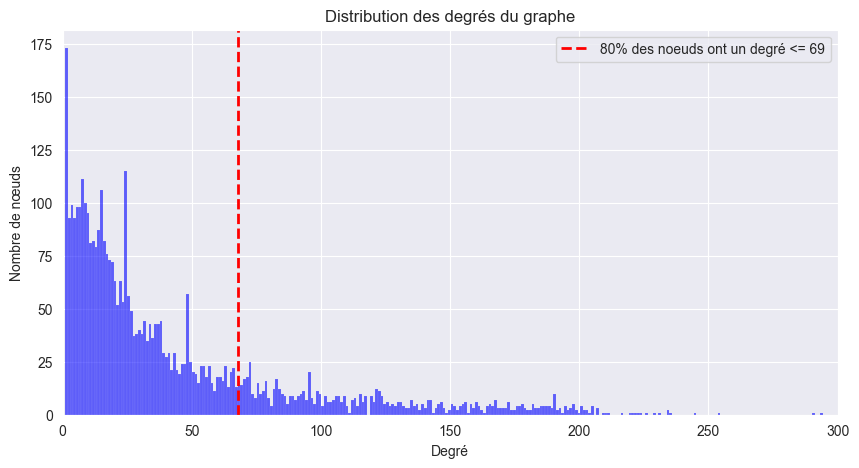

In [59]:
# Calculer les degrés de chaque nœud
degrees = [deg for _, deg in G.degree()]

# Calcul de 80% des valeurs
degrees = np.array(degrees)
degrees_sorted = np.sort(degrees)
unique_degree, count_degree = np.unique(degrees_sorted, return_counts=True)
cumulative_percentage = np.cumsum(count_degree) / len(degrees)
idx_80 = np.argmax(cumulative_percentage >= 0.8)
print(f"80% des nœuds ont un degré <= {unique_degree[idx_80]}")

# Afficher quelques statistiques
print(f"Degré minimum : {min(degrees)}")
print(f"Degré maximum : {max(degrees)}")
print(f"Degré moyen : {np.mean(degrees):.2f}")

# Version seaborn
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.histplot(degrees, bins=1000, color='blue', log_scale=False, alpha=0.6)
plt.axvline(x=idx_80, color='red', linestyle='--', linewidth=2, label = f"80% des noeuds ont un degré <= {unique_degree[idx_80]}")
plt.xlim(0, 300)
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés du graphe")
plt.legend()
plt.show()

- Distribution à queue longue (loi de puissance): 80% des noeuds ont un degré compris entre 1 et 69
- Quelques rares "super-connecteurs" -> personnes très influentes (attention aux ego listés au début du Notebook qui sont naturellement sur-représentés car les graphes sont construits à partir de leur réseau)

### Visualisation du graphe

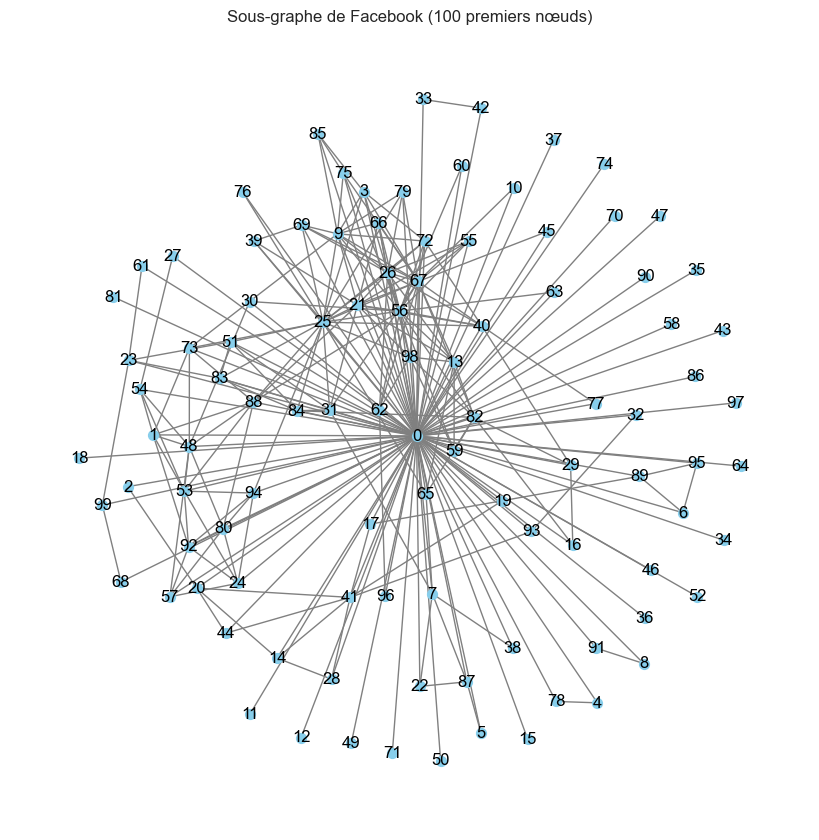

In [61]:
# Extraire un sous-graphe (par exemple les 100 premiers nœuds)
nodes_sample = list(G.nodes)[:100]
H = G.subgraph(nodes_sample)

# Visualiser ce sous-graphe
plt.figure(figsize=(8, 8))
nx.draw(H, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray')
plt.title("Sous-graphe de Facebook (100 premiers nœuds)")
plt.show()

# Analyses de centralité

### Degree centrality
- Mesure la fraction des noeuds connectés au noeud concerné

In [62]:
degree_centrality = nx.degree_centrality(G)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par centralité en degré :")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

Top 5 nœuds par centralité en degré :
Nœud 107 -> Centralité : 0.2588
Nœud 1684 -> Centralité : 0.1961
Nœud 1912 -> Centralité : 0.1870
Nœud 3437 -> Centralité : 0.1355
Nœud 0 -> Centralité : 0.0859


- Comme attendu on retrouve des noeuds de la liste des egos (le dataset a été construit à partir de leurs relations)

In [65]:
# Vérification
top_centrality = len(list(G.neighbors(107))) / (G.number_of_nodes() - 1) 
top_centrality

0.25879148093115406

In [68]:
# Enlever les noeuds ego
G_no_ego = G.copy()
G_no_ego.remove_nodes_from(list(ego_ids))

In [69]:
degree_centrality_no_ego = nx.degree_centrality(G_no_ego)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(degree_centrality_no_ego.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par centralité en degré (excepté noeuds ego):")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

Top 5 nœuds par centralité en degré (excepté noeuds ego):
Nœud 2543 -> Centralité : 0.0727
Nœud 2347 -> Centralité : 0.0720
Nœud 1888 -> Centralité : 0.0628
Nœud 1800 -> Centralité : 0.0606
Nœud 1663 -> Centralité : 0.0581


- Le noeud 2543 est intéressant car il concentre 7% des connexions possibles alors que tout son réseau n'est pas représenté 

### Betweenness centrality

- Mesure l’importance d’un nœud pour la circulation de l’information (il est sur beaucoup de chemins courts).
- Ces nœuds jouent un rôle de ponts entre différentes parties du graphe.

In [71]:
betweenness_centrality = nx.betweenness_centrality(G)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par intermédiarité :")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

Top 5 nœuds par intermédiarité :
Nœud 107 -> Centralité : 0.4805
Nœud 1684 -> Centralité : 0.3378
Nœud 3437 -> Centralité : 0.2361
Nœud 1912 -> Centralité : 0.2293
Nœud 1085 -> Centralité : 0.1490


- On retrouve des noeuds de la liste ego. Cependant le classement diffère. Le noeud 107 est non seulement le noeud avec le plus de connexions directes (le plus grand nombres d'amis) mais semble aussi être une relation intéressante dans le cadre de networking: si l'on veut contacter quelqu'un de ce graphe, il y a des bonnes chances que 107 soit la personne qui nous mette en contact le plus directement (plus cours chemin).

- L'utilisateur 0 est un utilisateur avec un grand nombre d'amis (top 5 classement degree centrality) mais n'est vraisemblablement pas au coeur du réseau (il possèdes un réseau d'amis potentiellement moins connecté et donc moins intéressant dans le cadre du networking)

# Community detection

## Méthode de Louvain (optimisation de la modularité)

- Algorithme basé sur l’optimisation de la modularité, une mesure de la densité des arêtes dans les communautés par rapport à un graphe aléatoire.

In [72]:
import community as community_louvain

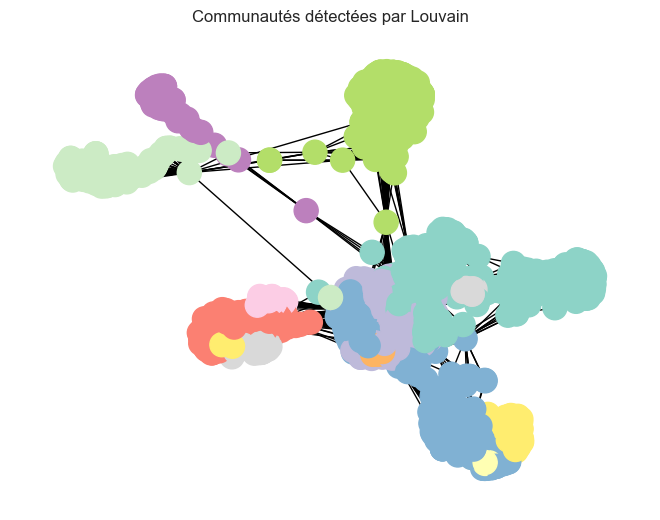

In [74]:
# Chaque noeud est affecté à une communauté (int)
# Exemple : {0: 1, 1: 0, 2: 1, 3: 2, ...}
partition = community_louvain.best_partition(G)

# Visualisation
pos = nx.spring_layout(G) # Position des noeuds
cmap =  # Couleurs
nx.draw(G, pos, node_color=list(partition.values()), with_labels=False, cmap=cmap)
plt.title("Communautés détectées par Louvain")
plt.show()

- Améliorons la visibilité du graphique:

    - Taille des noeuds variable en fonction du degré
    - Affichage des labeles des noeuds principaux
    - Ajout de transparence des arrêtes

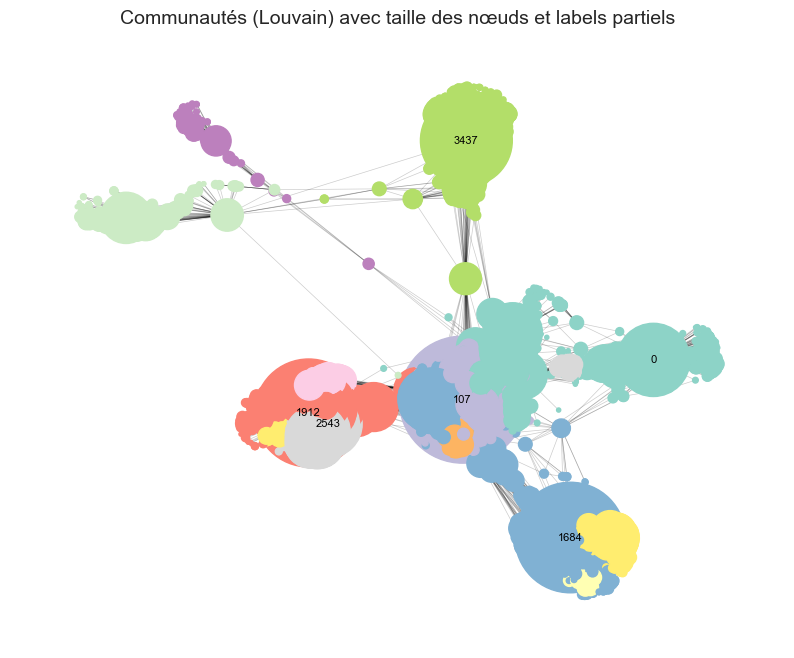

In [112]:
plt.figure(figsize=(10, 8))
node_sizes = [1 + 8 * G.degree(n) for n in G.nodes()]
labels = {n: str(n) for n in G.nodes() if G.degree(n) > 300}
# Ajout de 243 discuté précédemment
labels[2543] = '2543'
cmap = plt.cm.Set3

nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(G, pos,
                       node_color=list(partition.values()),
                       node_size=node_sizes,
                       cmap=cmap)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.title("Communautés (Louvain) avec taille des nœuds et labels partiels", fontsize=14)
plt.axis('off')
plt.show()

In [107]:
# Nombre de communautés
nb_louvain_community = len(set(partition.values()))
print(f"Nombre de communautés détectées par Louvain : {nb_louvain_community}")

Nombre de communautés détectées par Louvain : 16


- On obtient 16 communautés
- On retrouve le fait que 107 occupe une place centrale dans ce réseau, ou encore que 0 est intéressant du point de vue de ses connexions directes mais moins par sa capacité à mettre en relation des utilisateurs.
- On a également affiché 2543 qui est le noeud avec le plus grand nombre d'amis (hors noeuds ego)

## Label Propagation Algorithm (LPA)

- Chaque nœud adopte le label le plus fréquent parmi ses voisins. Processus itératif jusqu’à convergence (méthode très rapide et sans paramètre)

In [113]:
from networkx.algorithms.community import label_propagation_communities

communities = list(label_propagation_communities(G))

In [115]:
communities
partition_lpa = {}
for index, community in enumerate(communities):
    for node in community:
        partition_lpa[node] = index

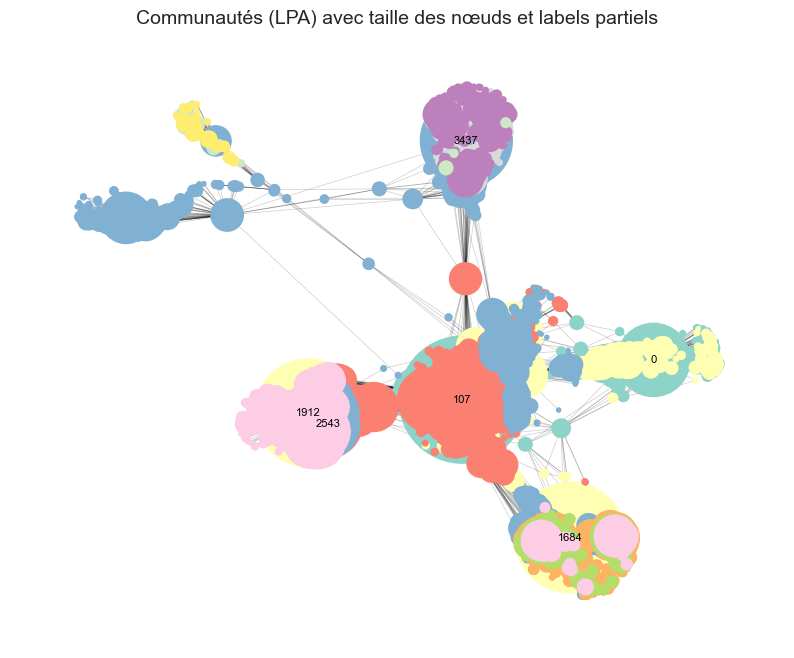

In [117]:
plt.figure(figsize=(10, 8))
node_sizes = [1 + 8 * G.degree(n) for n in G.nodes()]
labels = {n: str(n) for n in G.nodes() if G.degree(n) > 300}
# Ajout de 243 discuté précédemment
labels[2543] = '2543'
cmap = plt.cm.Set3

nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(G, pos,
                       node_color=list(partition_lpa.values()),
                       node_size=node_sizes,
                       cmap=cmap)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.title("Communautés (LPA) avec taille des nœuds et labels partiels", fontsize=14)
plt.axis('off')
plt.show()

- La méthode LPA a tourné beaucoup plus rapidement mais on constate des communautés moins distinctes visuellement

- C'est l'occasion de nous pencher sur la méthode de visualisation spring layout (aussi appelé Fruchterman-Reingold) qui positionne les nœuds selon une simulation physique :

	- Les arêtes se comportent comme des ressorts entre les nœuds → elles veulent réduire leur longueur.
	- Les nœuds se repoussent les uns les autres pour éviter le chevauchement.
	- Cette méthode ne dit rien sur les communautés mais positionne les noeuds uniquement selon leur "force locale"

# Embedding